In [295]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks',color_codes=True)
# Any results you write to the current directory are saved as output.

['Country-Code.xlsx', 'file4.json', 'file3.json', 'file1.json', 'file2.json', 'zomato.csv', 'file5.json']


In [296]:
df=pd.read_csv("../input/zomato.csv",encoding='ISO-8859-1')

In [297]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [298]:
df.shape

(9551, 21)

In [299]:
# There are no duplicate record
# if duplicate record found retun value is true
df[df.duplicated()==True] 

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes


In [300]:
#getting the columns which has null value
null_columns=df.columns[df.isnull().any()]
null_columns

Index(['Cuisines'], dtype='object')

In [301]:
#getting columns name with null value count
df[null_columns].isnull().sum()

Cuisines    9
dtype: int64

In [302]:
#remove records that has null value as these are very small as compare to dataset
#df=df.dropna(how='any',axis=0) if we want drop the record with null value

In [303]:
#Restaurant which has 'Average cost for two' is 0
df1=df[df['Average Cost for two']==0]
df1.head()
# It is found that these restaurant has No 'Has Table booking' and no 'Has online delivery'

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.1540,31.5772,NaN,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,34
85,17284302,El Vaquero Mexican Restaurant,216,Albany,"2700 Dawson Rd, Albany, GA 31707",Albany,"Albany, Albany",-84.2194,31.6158,Mexican,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,45
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.1759,31.5882,NaN,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,36
201,17330155,Deorio's,216,Columbus,"3201 Macon Rd Ste 167, Columbus, GA 31906",Columbus,"Columbus, Columbus",-84.9427,32.4810,"Italian, Pizza",0,Dollar($),No,No,No,No,1,4.0,Green,Very Good,170
240,17334679,Azteca,216,Davenport,"4811 N Brady St Ste 3, Davenport, IA 52806",Davenport,"Davenport, Davenport",-90.5683,41.5699,Mexican,0,Dollar($),No,No,No,No,1,4.3,Green,Very Good,167


In [304]:
# if we consider record which has 'Average Cost for two' is greater than 0
#df=df[df['Average Cost for two']!=0]

In [305]:
# Getting unique restaurant name
unique_rest_name=set(df['Restaurant Name'])
len(unique_rest_name) # gives total number of unique restaurant name i.e 7446

7446

In [306]:
#description of dataset
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [307]:
#From above: Max Agg. ratng=4.9, Min Agg. rating=0.0(or not rated)

In [308]:
#Total number of restaurant according to city
df_city=df.groupby('City').count()
df_city.head()

,Restaurant ID,Restaurant Name,Country Code,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
City,,,,,,,,,,,,,,,,,,,,
Abu Dhabi,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
Agra,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
Ahmedabad,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
Albany,20,20,20,20,20,20,20,20,17,20,20,20,20,20,20,20,20,20,20,20
Allahabad,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20


In [309]:
# City found with max restaurant: New Delhi-5473
max_city=max(df_city['Restaurant ID'])#get max number of city
df_city[df_city['Restaurant ID']==5473]# give the name of cities

,Restaurant ID,Restaurant Name,Country Code,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
City,,,,,,,,,,,,,,,,,,,,
New Delhi,5473,5473,5473,5473,5473,5473,5473,5473,5473,5473,5473,5473,5473,5473,5473,5473,5473,5473,5473,5473


In [310]:
# There are many cities which has 1 restaurant 
#Total number of cities are 46
min_city=min(df_city['Restaurant ID'])# give minimum number of city which is 1 
name_city=df_city[df_city['Restaurant ID']==1]# name of cities
name_city.head()

,Restaurant ID,Restaurant Name,Country Code,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
City,,,,,,,,,,,,,,,,,,,,
Armidale,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Balingup,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Bandung,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Beechworth,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Chatham-Kent,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [311]:
# Total number of cities that has minimum number of restaurant
name_city.shape[0] #gives number which is 46

46

In [312]:
# ON AGGREGATE RATING ANALYSIS

In [313]:
#counting the number of restaurant on Aggregate rating
# 
aggregate_rat_count=df.groupby('Aggregate rating').count()
aggregate_rat_count

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating color,Rating text,Votes
Aggregate rating,,,,,,,,,,,,,,,,,,,,
0.0,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148
1.8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1.9,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2.0,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
2.1,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
2.2,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
2.3,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
2.4,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87
2.5,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110


In [314]:
# getting rautaurant which has rating above 4.9
df_max_rating=df[df['Aggregate rating']==4.9]
df_max_rating.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",6000,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
10,6309903,Silantro Fil-Mex,162,Pasig City,"75 East Capitol Drive, Kapitolyo, Pasig City",Kapitolyo,"Kapitolyo, Pasig City",121.057916,14.567689,"Filipino, Mexican",800,Botswana Pula(P),No,No,No,No,3,4.9,Dark Green,Excellent,1070
39,6600427,Coco Bambu,30,Brasí_lia,"SCES, Trecho 2, Conjunto 13/36, Setor de Clube...",Setor De Clubes Esportivos Sul,"Setor De Clubes Esportivos Sul, Brasí_lia",-47.868500,-15.819000,International,230,Brazilian Real(R$),No,No,No,No,4,4.9,Dark Green,Excellent,30
48,7300955,Braseiro da Gíçvea,30,Rio de Janeiro,"Praí_a Santos Dumont, 116, Gíçvea, Rio de Janeiro",Gíçvea,"Gíçvea, Rio de Janeiro",-43.227042,-22.973507,"Brazilian, Bar Food",100,Brazilian Real(R$),No,No,No,No,4,4.9,Dark Green,Excellent,40


In [315]:
#Lets assume Restaurant which has rating above 3 is good.
#Finding restauratn which has rating greater than 3.
df_good_rating=df[df['Aggregate rating']>3]
df_good_rating.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [316]:
#Finding total number of good restaurant
total_good_restaurant=df_good_rating.shape[0]
total_good_restaurant # total number: 5502

5502

In [317]:
# finding which city has what numbre good restaurants
good_rate_restaurant_count=df_good_rating.groupby('City').count()
good_rate_restaurant_count.head()

,Restaurant ID,Restaurant Name,Country Code,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
City,,,,,,,,,,,,,,,,,,,,
Abu Dhabi,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
Agra,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
Ahmedabad,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
Albany,20,20,20,20,20,20,20,20,17,20,20,20,20,20,20,20,20,20,20,20
Allahabad,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20


In [318]:
#max restaurant in with rating above 3.0 is in new delhi
get_max=max(good_rate_restaurant_count['Restaurant ID'])# got 2801
ak=good_rate_restaurant_count[good_rate_restaurant_count['Restaurant ID']==2801]
ak

,Restaurant ID,Restaurant Name,Country Code,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
City,,,,,,,,,,,,,,,,,,,,
New Delhi,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801


In [319]:
# Restaurant which is not rated
df_min_rating=df[df['Aggregate rating']==0.0]
df_min_rating.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
30,6600060,Sandubas Cafí©,30,Brasí_lia,"Edifí_cio Josí© Severo, SCS 6, Bloco A, Loja 9...",Asa Sul,"Asa Sul, Brasí_lia",-47.890167,-15.797000,"Brazilian, Cafe",30,Brazilian Real(R$),No,No,No,No,1,0.0,White,Not rated,2
58,7305048,Quiosque Chopp Brahma,30,Rio de Janeiro,"Madureira Shopping - Loja 289/290, Piso 2, Est...",Madureira,"Madureira, Rio de Janeiro",-43.341164,-22.870413,"Bar Food, Brazilian",70,Brazilian Real(R$),No,No,No,No,3,0.0,White,Not rated,1
69,6710645,Cantinho da Gula,30,Sí£o Paulo,"Rua Pedroso Alvarenga, 522, Itaim Bibi, Sí£o P...",Itaim Bibi,"Itaim Bibi, Sí£o Paulo",-46.675667,-23.581000,Brazilian,55,Brazilian Real(R$),No,No,No,No,2,0.0,White,Not rated,0
77,6701419,Divino Fogí£o,30,Sí£o Paulo,"Shopping MetríÇ Santa Cruz - Piso L2, Rua Domi...","Shopping MetríÇ Santa Cruz, Vila Mariana","Shopping MetríÇ Santa Cruz, Vila Mariana, Sí£o...",-46.637167,-23.599500,"Brazilian, Mineira",65,Brazilian Real(R$),No,No,No,No,3,0.0,White,Not rated,2
78,6703956,Super Grill,30,Sí£o Paulo,"Shopping Morumbi - Piso Lazer, Avenida Roque P...","Shopping Morumbi, Santo Amaro","Shopping Morumbi, Santo Amaro, Sí£o Paulo",-46.698574,-23.622925,Brazilian,50,Brazilian Real(R$),No,No,No,No,2,0.0,White,Not rated,2


In [320]:
# finding restaurant which is not rated
#New Delhi has 1425 restaurant not rated
not_rate_restaurant_count=df_min_rating.groupby('City').count()
not_rate_restaurant_count

,Restaurant ID,Restaurant Name,Country Code,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
City,,,,,,,,,,,,,,,,,,,,
Birmingham,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Brasí_lia,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Davenport,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Faridabad,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
Ghaziabad,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Gurgaon,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228
New Delhi,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425
Noida,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384
Pocatello,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


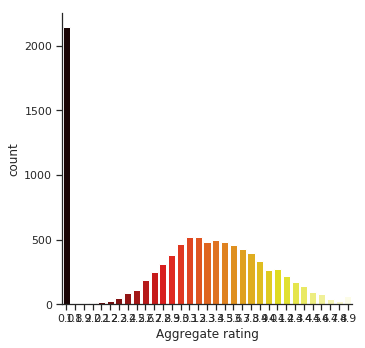

In [321]:
# number of restaurants vs aggregate rating
sns.catplot(x="Aggregate rating", kind="count", palette="hot", data=df)

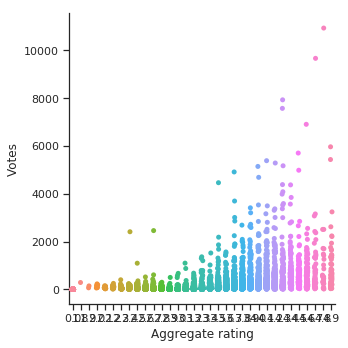

In [322]:
# Aggregate rating vs votes chart
# from the below chart we now know that max votes is gives to max rating 
sns.catplot(x='Aggregate rating',y='Votes',data=df)

In [323]:
#getting max votes
max(df['Votes']) #gives 10934

10934

In [324]:
# finding best restaurant on the basis of votes and Aggregate rating
df[df['Votes']==10934]# Toit- bangalore


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
728,51705,Toit,1,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,"Italian, American, Pizza",2000,Indian Rupees(Rs.),No,No,No,No,4,4.8,Dark Green,Excellent,10934


In [325]:
# RATING TEXT ANALYSIS

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


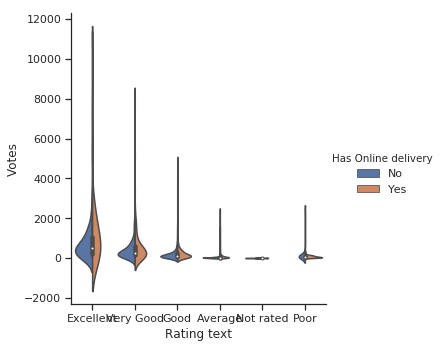

In [326]:
sns.catplot(x="Rating text", y="Votes", hue="Has Online delivery",
            kind="violin", split=True, data=df)

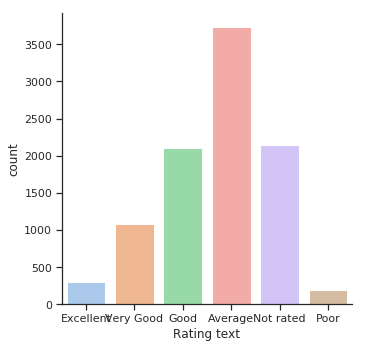

In [327]:
sns.catplot(x="Rating text", kind="count", palette="pastel", data=df)

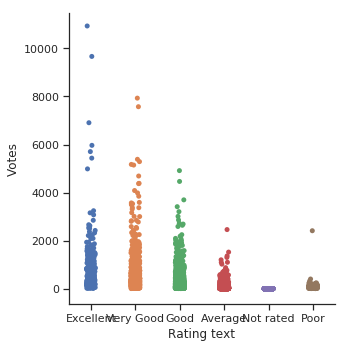

In [328]:
sns.catplot(x='Rating text',y='Votes',data=df)

In [329]:
text_r_count=df.groupby('Rating text').count()
text_r_count

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Votes
Rating text,,,,,,,,,,,,,,,,,,,,
Average,3737,3737,3737,3737,3737,3737,3737,3737,3737,3734,3737,3737,3737,3737,3737,3737,3737,3737,3737,3737
Excellent,301,301,301,301,301,301,301,301,301,300,301,301,301,301,301,301,301,301,301,301
Good,2100,2100,2100,2100,2100,2100,2100,2100,2100,2096,2100,2100,2100,2100,2100,2100,2100,2100,2100,2100
Not rated,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148
Poor,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186
Very Good,1079,1079,1079,1079,1079,1079,1079,1079,1079,1078,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079


In [330]:
# From above table we can see that maximum number of restaurant has average rating

In [331]:
# min and max 'Average rating' on the basis of 'Rating text' 
df_avg=df[df['Rating text']=='Average']
print(min(df_avg['Aggregate rating']))
max(df_avg['Aggregate rating'])

2.5


3.4

In [332]:
# min and max 'Average rating' on the basis of 'Rating text' 
df_poor=df[df['Rating text']=='Poor']
print(min(df_poor['Aggregate rating']))
max(df_poor['Aggregate rating'])

1.8


2.4

In [333]:
# min and max 'Average rating' on the basis of 'Rating text' 
df_good=df[df['Rating text']=='Good']
print(min(df_good['Aggregate rating']))
max(df_good['Aggregate rating'])

3.5


3.9

In [334]:
# min and max 'Average rating' on the basis of 'Rating text' 
df_vgood=df[df['Rating text']=='Very Good']
print(min(df_vgood['Aggregate rating']))
max(df_vgood['Aggregate rating'])

4.0


4.4

In [335]:
# min and max 'Average rating' on the basis of 'Rating text' 
df_excel=df[df['Rating text']=='Excellent']
print(min(df_excel['Aggregate rating']))
max(df_excel['Aggregate rating'])

4.5


4.9

In [336]:
#RATING COLOR ANALYSIS

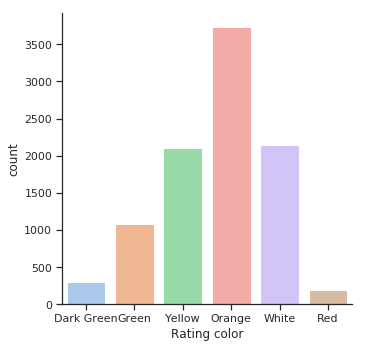

In [337]:
#number restaurants 
#Maximum number of the restaurant is given orange color rating
sns.catplot(x="Rating color", kind="count", palette="pastel", data=df)

In [338]:
# gives the number of restaurant corresponding to color rating
#Dark green :299(min number of restaurant)
#Orange : 3732(max number of restaurant)
Color_rat_count=df.groupby('Rating color').count()
Color_rat_count

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes
Rating color,,,,,,,,,,,,,,,,,,,,
Dark Green,301,301,301,301,301,301,301,301,301,300,301,301,301,301,301,301,301,301,301,301
Green,1079,1079,1079,1079,1079,1079,1079,1079,1079,1078,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079
Orange,3737,3737,3737,3737,3737,3737,3737,3737,3737,3734,3737,3737,3737,3737,3737,3737,3737,3737,3737,3737
Red,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186
White,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148,2148
Yellow,2100,2100,2100,2100,2100,2100,2100,2100,2100,2096,2100,2100,2100,2100,2100,2100,2100,2100,2100,2100


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",6000,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532
10,6309903,Silantro Fil-Mex,162,Pasig City,"75 East Capitol Drive, Kapitolyo, Pasig City",Kapitolyo,"Kapitolyo, Pasig City",121.057916,14.567689,"Filipino, Mexican",800,Botswana Pula(P),No,No,No,No,3,4.9,Dark Green,Excellent,1070
12,6318433,Silantro Fil-Mex,162,Quezon City,"Second Floor, UP Town Center, Katipunan Avenue...","UP Town Center, Diliman, Quezon City","UP Town Center, Diliman, Quezon City, Quezon City",121.075419,14.649503,"Filipino, Mexican",800,Botswana Pula(P),No,No,No,No,3,4.8,Dark Green,Excellent,294
17,6318213,Balay Dako,162,Tagaytay City,"Aguinaldo Highway, Tagaytay City",Tagaytay City,"Tagaytay City, Tagaytay City",120.951589,14.101834,Filipino,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,211
18,18255654,Hobing Korean Dessert Cafe,162,Taguig City,"Third Floor, BGC Stopover Pavillion, Rizal Dri...","BGC Stopover Pavillion, Bonifacio Global City","BGC Stopover Pavillion, Bonifacio Global City,...",121.045878,14.554360,"Cafe, Korean, Desserts",600,Botswana Pula(P),No,No,No,No,2,4.5,Dark Green,Excellent,118


In [346]:
# min and max 'Average rating' on the basis of 'Rating color' 
df_dg=df[df['Rating color']=='Dark Green']
print(min(df_dg['Aggregate rating']))
max(df_dg['Aggregate rating'])

4.5


4.9

In [347]:
# min and max 'Average rating' on the basis of 'Rating color' 
df_g=df[df['Rating color']=='Green']
print(min(df_g['Aggregate rating']))
max(df_g['Aggregate rating'])

4.0


4.4

In [348]:
# min and max 'Average rating' on the basis of 'Rating color' 
df_or=df[df['Rating color']=='Orange']
print(min(df_or['Aggregate rating']))
max(df_or['Aggregate rating'])

2.5


3.4

In [349]:
# min and max 'Average rating' on the basis of 'Rating color' 
df_rd=df[df['Rating color']=='Red']
print(min(df_rd['Aggregate rating']))
max(df_rd['Aggregate rating'])

1.8


2.4

In [350]:
# min and max 'Average rating' on the basis of 'Rating color' 
df_w=df[df['Rating color']=='White']
print(min(df_w['Aggregate rating']))
max(df_w['Aggregate rating'])

0.0


0.0

In [353]:
# min and max 'Average rating' on the basis of 'Rating color' 
df_y=df[df['Rating color']=='Yellow']
print(min(df_y['Aggregate rating']))
max(df_y['Aggregate rating'])

3.5


3.9

In [ ]:
#From above analysis we found following result
#  Rating text   Rating color   Aggregate rating
#                               min         max
#  Excellent      Dark Green    4.5         4.9
#  Very Good        Green       4.0         4.4
#  Good             Yellow      3.5         3.9
#  Average          Orange      2.5         3.4
#  Poor             Red         1.8         2.4
#  Not rated        White       0.0         0.0